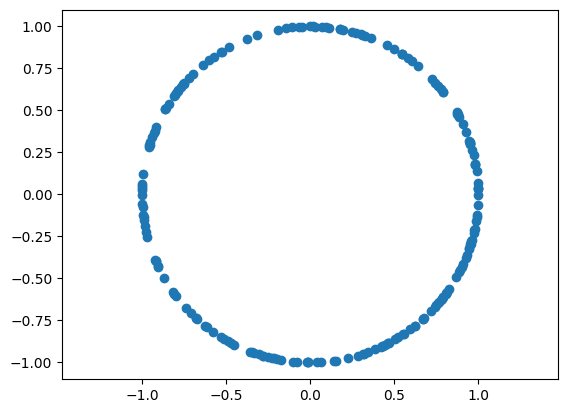

In [3]:
import jax
import matplotlib.pyplot as plt

def circle(theta, r):
    return r * jax.numpy.cos(theta), r * jax.numpy.sin(theta)

def plot_circle(r, theta):
    x, y = circle(theta, r)
    plt.scatter(x, y)
    plt.axis('equal')
    plt.show()
    

key = jax.random.PRNGKey(0)
distributed_theta = jax.random.uniform(key, (100, 2), minval=0, maxval=2 * jax.numpy.pi)
plot_circle(1, distributed_theta)


